In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def procesamiento_datos():
    df = pd.read_excel('datos.xlsx')
    df = df.dropna(axis=1, how='all')
    df = df.dropna(axis=0, how='all')
    df.drop(index=3, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.rename(columns={'Unnamed: 2': 'dia', 'Unnamed: 3': 'acumulado'}, inplace=True)

    x = df["dia"].astype(float).values
    y = df["acumulado"].astype(float).values
    return x, y

def regresion_lineal(x, y):
    n = len(x)
    sumX = np.sum(x)
    sumY = np.sum(y)
    sumXX = np.sum(x * x)
    sumXY = np.sum(x * y)

    a = ((n*sumXY) - (sumX*sumY)) / ((n*sumXX)-(sumX**2))
    b = (sumY- (a*sumX))/n
    return a, b

def recta_prediccion(a, b, x):
    y_prima = [a * xi + b for xi in x]
    return y_prima

def error_regresion(a, b, x, y):
    error = np.sum(((a * x) + b - y) ** 2)
    return error

def plot_resultados(x, y, y_prima, a, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Datos originales')
    plt.plot(x, y_prima, color='red', label=f'Regresión lineal: y={a.round(3)}x + {b.round(3)}')
    plt.xlabel('Días')
    plt.ylabel('Acumulado')
    plt.title('Día vs Acumulado con Regresión Lineal')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

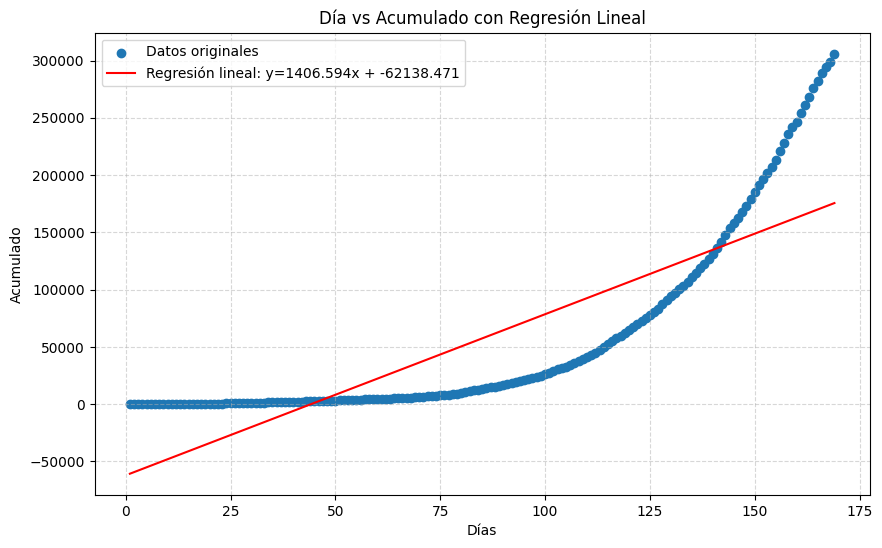

In [3]:
x, y = procesamiento_datos()
a, b = regresion_lineal(x, y)
y_prima = recta_prediccion(a, b, x)
plot_resultados(x, y, y_prima, a, b)

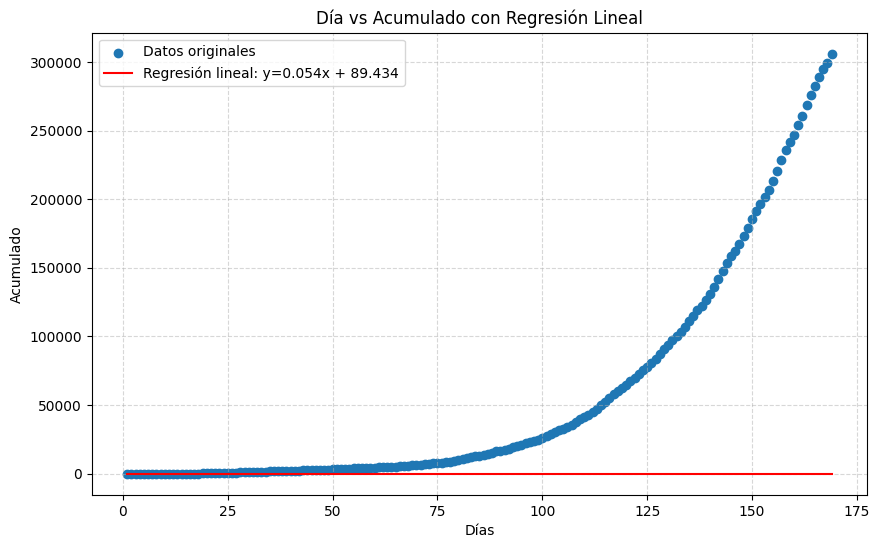

Ambas son igualmente eficientes


In [4]:
y_log = np.log(y)
a, b_prima = regresion_lineal(x, y_log)
b = np.exp(b_prima)
y_prima = recta_prediccion(a, b, x)
plot_resultados(x, y, y_prima, a, b)

e1 = error_regresion(a, b, x, y)
e2 = error_regresion(a,b,x,y)

if e1 < e2:
    print("La primer función es mejor.")
elif e1 > e2:
    print("La segunda función es mejor.")
else: 
    print("Ambas son igualmente eficientes")